In [3]:
# importing Required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
#load the data from .csv file 
df1 = pd.read_csv("C:/Users/Avdhut/House-Price-Prediction-Mumbai-2-main/Mumbai.csv")
df1.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/HousePricePredictionMumbai/Mumbai.csv'

In [3]:
df1.dtypes

NameError: name 'df1' is not defined

In [4]:
#check the no. of rows and columns (rows,columns) in dataset
df1.shape

NameError: name 'df1' is not defined

In [5]:
#drop unused columns
df2 = df1.drop(['Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','RainWaterHarvesting','IndoorGames','ShoppingMall','Intercom','SportsFacility','ATM','ClubHouse','School','24X7Security','PowerBackup','StaffQuarter','Cafeteria','MultipurposeRoom','Hospital','WashingMachine','AC','Wifi','LiftAvailable','BED','VaastuCompliant','Microwave','GolfCourse','TV','DiningTable','Sofa','Wardrobe','Refrigerator','Childrensplayarea'],axis='columns')
df2.head(8)

NameError: name 'df1' is not defined

In [6]:
#isnull() will tell you the value is NA or not , if vale is NA then drop those values
df2.isnull().sum()

NameError: name 'df2' is not defined

In [7]:
#drop the values using dropna()
df3 = df2.dropna()
df3.isnull().sum()

NameError: name 'df2' is not defined

In [8]:
# fn to check value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [9]:
#check for column 'Area' contains values float or not and return No-float values
df3[~df3['Area'].apply(is_float)].head(10)

NameError: name 'df3' is not defined

In [10]:
# fn takes input as range value if present (i.e. 10 - 45) and return the average of these no.s
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [11]:
# Create a copy
df4 = df3.copy()
df4.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,4850000,720,Kharghar,bhk,1,1,1,0
1,4500000,600,Kharghar,rk,0,1,1,0
2,6700000,650,Kharghar,rk,0,1,1,0
3,4500000,650,Kharghar,rk,0,1,1,0
4,5000000,665,Kharghar,rk,0,1,1,0


In [12]:
#view the location 320
df4.loc[320]

Price                 90000000
Area                      5245
Location            Thane West
sizeRkorBhk                bhk
Num_of_bedrooms              5
Num_of_bathrooms             5
CarParking                   1
Gasconnection                1
Name: 320, dtype: object

In [13]:
#deep copy and create price_per_sqft col 
df5 = df4.copy()
df5['price_per_sqft']=df5['Price']/df5['Area']
df5.head(7)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129


In [14]:
#check unique no. of location
len(df5.Location.unique())

413

In [15]:
#remove unwanted space at starting and end of the location
df5.Location = df5.Location.apply(lambda x:x.strip())
#to view how many times the location present e.g. kharghar contains 681 data rows 
Location_stats = df5.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
Location_stats

Location
Kharghar                 681
Thane West               576
Mira Road East           481
Ulwe                     391
Nala Sopara              225
                        ... 
Ramdev Park                1
Rawal Pada                 1
Rustomjee Global City      1
Sahkar Nagar               1
worli sea face             1
Name: Location, Length: 413, dtype: int64

In [16]:
#check how many locations have less than or equal to 10 datarows
len(Location_stats[Location_stats <= 10])

312

In [17]:
Location_stats_less_than_10 = Location_stats[Location_stats <= 10]
Location_stats_less_than_10

Location
Rajendra Nagar           10
Kalamboli                10
Prabhadevi               10
Sector 10                10
Mumbai Central           10
                         ..
Ramdev Park               1
Rawal Pada                1
Rustomjee Global City     1
Sahkar Nagar              1
worli sea face            1
Name: Location, Length: 312, dtype: int64

In [18]:
len(df5.Location.unique())

413

In [19]:
# Location set to 'other' if location_stats_less_than_10 else whatever is your value print it
df5.Location = df5.Location.apply(lambda x:'other' if x in Location_stats_less_than_10 else x)
len(df5.Location.unique())

102

In [20]:
df5.head(10)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129
7,10500000,1370,other,bhk,3,3,1,0,7664.233577
8,10500000,1356,Kharghar,bhk,3,3,1,0,7743.362832
9,15000000,1680,Kharghar,bhk,3,3,1,1,8928.571429


In [21]:
#OutLier Detection
#set threshod of Num_of_bedroom is 300 
df5[df5.Area/df5.Num_of_bedrooms < 300].head()

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
2000,260000000,1165,other,bhk,4,4,1,1,223175.965665
2065,260000000,1165,other,bhk,4,4,1,1,223175.965665
3624,3500000,586,Andheri West,rk,2,2,0,0,5972.696246
5406,5700000,901,Mira Road East,bhk,4,4,1,1,6326.304107


In [22]:
df5.shape

(7717, 9)

In [23]:
#here we remove some outliers which does not match our threshold 
df6 = df5[~(df5.Area / df5.Num_of_bedrooms < 300)]
df6.shape

(7713, 9)

In [24]:
#describe() gives you statstics of that particular column
df6.price_per_sqft.describe()

count      7713.000000
mean      16120.418053
std       19298.449729
min         460.526316
25%        6461.538462
50%       10410.094637
75%       18723.994452
max      400000.000000
Name: price_per_sqft, dtype: float64

In [25]:
# to remove min and max extreme cases based on S.D use below fn and it removes price per sqft outlier
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(6785, 9)

In [26]:
# This program predict the house price

# import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

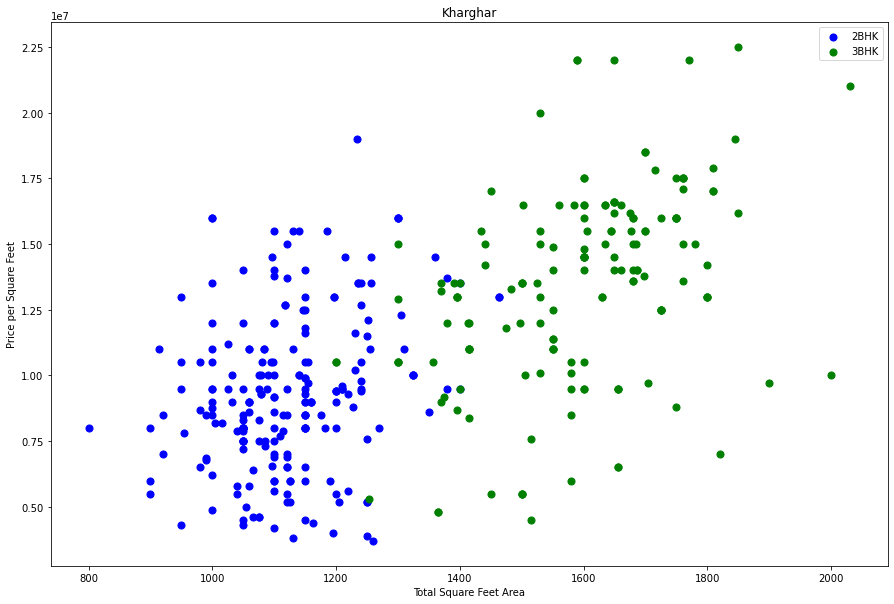

In [27]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location == Location)&(df.Num_of_bedrooms == 2)]
    bhk3 = df[(df.Location == Location)&(df.Num_of_bedrooms == 3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.Area,bhk3.Price,color='green',label='3BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df7,"Kharghar")

In [28]:
# remove bhk outlier means 2bhk price is always less than 3bhk price
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location,Location_df in df.groupby('Location'):
        Num_of_bedrooms_stats = {}
        for Num_of_bedrooms,Num_of_bedrooms_df in Location_df.groupby('Num_of_bedrooms'):
            Num_of_bedrooms_stats[Num_of_bedrooms]={
                'mean':np.mean(Num_of_bedrooms_df.price_per_sqft),
                'std':np.std(Num_of_bedrooms_df.price_per_sqft),
                'count':Num_of_bedrooms_df.shape[0]
            }
    for Num_of_bedrooms,Num_of_bedrooms_df in df.groupby('Num_of_bedrooms'):
        stats = Num_of_bedrooms_stats.get(Num_of_bedrooms-1)
        if stats and stats['count']>5:
            exclude_indices = np.append(exclude_indices,Num_of_bedrooms_df[
                Num_of_bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')          
        
df8 = remove_bhk_outliers(df7)
df8.shape

(4509, 9)

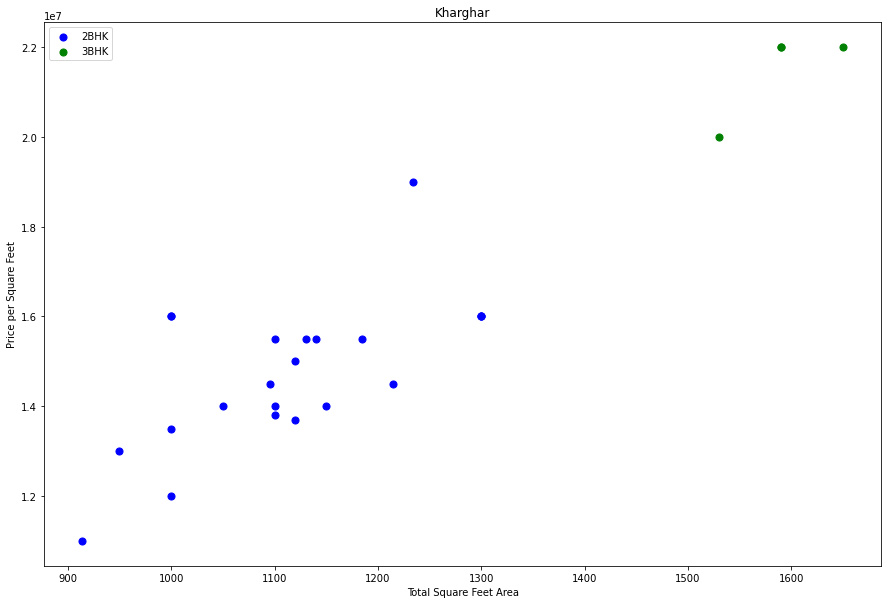

In [29]:
plot_scatter_chart(df8,"Kharghar")

Text(0, 0.5, 'Count')

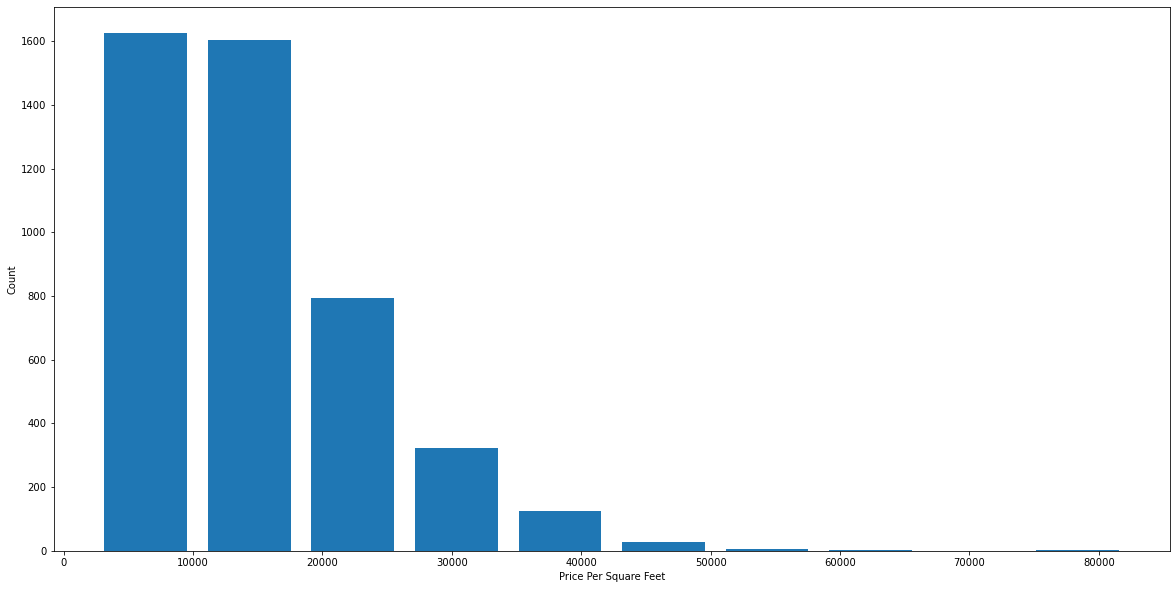

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
df8.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,6200000,400,Airoli,rk,0,1,1,0,15500.000000
2,14900000,1245,Airoli,bhk,2,2,1,1,11967.871486
3,14000000,1183,Airoli,bhk,2,2,1,0,11834.319527
5,6400000,495,Airoli,rk,0,1,0,0,12929.292929
6,3800000,495,Airoli,rk,0,1,0,0,7676.767677


In [32]:
#check no of bathrooms > 5
df8[df8.Num_of_bathrooms > 5]

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
4624,90000000,5642,Sion,bhk,6,6,1,1,15951.790145
4625,90000000,5642,Sion,bhk,6,6,1,1,15951.790145
6445,55000000,2500,other,bhk,7,7,1,1,22000.000000


Text(0, 0.5, 'Count')

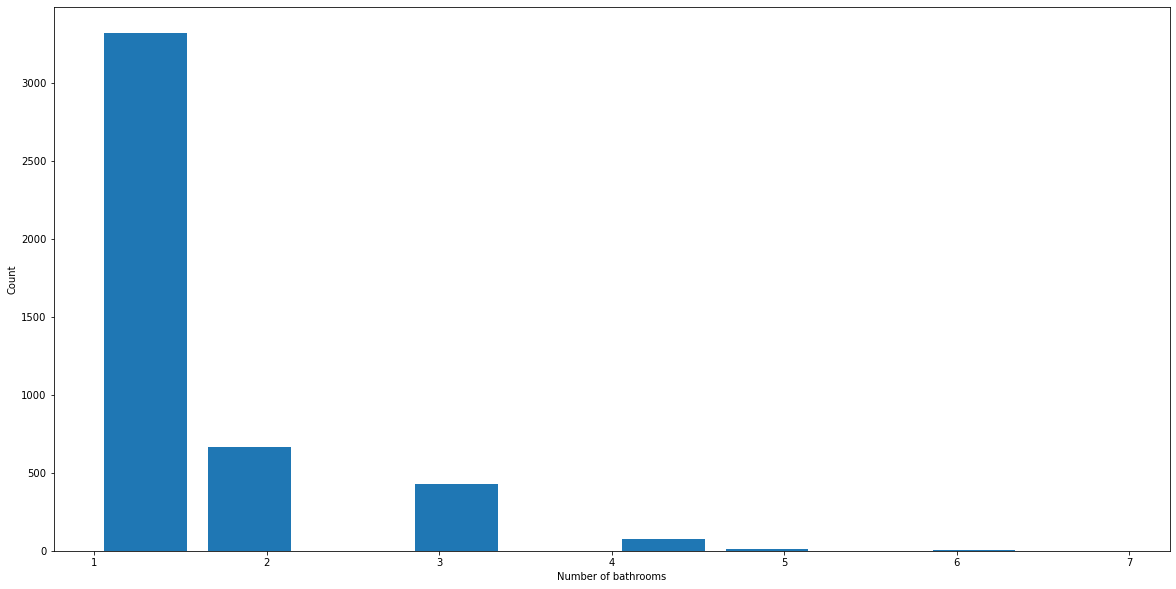

In [33]:
plt.hist(df8.Num_of_bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [34]:
# check bedrooms > bathroom+2 condition
df8[df8.Num_of_bathrooms > df8.Num_of_bedrooms+2]

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
1235,8500000,676,Ghatkopar,rk,0,3,1,0,12573.964497


In [35]:
#Remove bathrooms outlier 
df9 = df8[df8.Num_of_bathrooms < df8.Num_of_bedrooms+2]
df9.shape

(4508, 9)

In [36]:
#drop price_per_sqft col
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,6200000,400,Airoli,rk,0,1,1,0
2,14900000,1245,Airoli,bhk,2,2,1,1
3,14000000,1183,Airoli,bhk,2,2,1,0
5,6400000,495,Airoli,rk,0,1,0,0
6,3800000,495,Airoli,rk,0,1,0,0


In [37]:
#Model Training

In [38]:
#ML model can not interprete text data (Location is text col) so have to convert it into numeric column 
#with the use of one hot encoding method
dummies = pd.get_dummies(df10.Location)
dummies.head(3)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,6200000,400,Airoli,rk,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,bhk,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,bhk,2,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#drop Location col
df12 = df11.drop('Location',axis='columns')
df12.head(3)

,Price,Area,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,6200000,400,rk,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,bhk,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,bhk,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df12.shape

(4508, 107)

In [42]:
# for size(rk or bhk) col

In [43]:
dummies2 = pd.get_dummies(df12.sizeRkorBhk)
dummies2.head(3)

,bhk,rk
0,0,1
2,1,0
3,1,0


In [44]:
df13 = pd.concat([df12,dummies2],axis='columns')
df13.head(3)

,Price,Area,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,6200000,400,rk,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14900000,1245,bhk,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14000000,1183,bhk,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
#drop sizeRkorBhk col
df14 = df13.drop('sizeRkorBhk',axis='columns')
df14.head(3)

,Price,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,Andheri,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,6200000,400,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14900000,1245,2,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14000000,1183,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
X = df14.drop('Price',axis='columns')
X.head(5)

,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,...,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,bhk,rk
0,400,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1245,2,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1183,2,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,495,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,495,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
Y = df14.Price
Y.head(5)

0     6200000
2    14900000
3    14000000
5     6400000
6     3800000
Name: Price, dtype: int64

In [194]:
# model training with sklearn's train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [289]:
model = RandomForestRegressor(n_estimators = 100,max_features=50,max_depth=50, random_state=42)
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=50, max_features=50, random_state=42)

In [290]:
y_pred = model.predict(X_test)

In [291]:
print(metrics.r2_score(Y_test,y_pred))

0.7236716480312173


In [281]:
def predict_price(Location,Area,Num_of_bathrooms,Num_of_bedrooms,CarParking,Gasconnection):
    loc_index = np.where(X.columns == Location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]=Area
    x[1]=Num_of_bathrooms
    x[2]=Num_of_bedrooms
    x[3]=CarParking
    x[4]=Gasconnection
    if loc_index >= 0:
        x[loc_index] = 1
        
        return model.predict([x])[0]

In [292]:
model.score(X_test,Y_test)


0.7236716480312173

In [185]:
predict_price('Virar',1000,1,2,1,1)

16572949.20363248

In [184]:
predict_price('Kharghar',720,1,1,0,0)

10799317.843467666

In [293]:
model.score(X_train,Y_train)

0.9221604722020325

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\Anaconda_3.9\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Anaconda_3.9\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\Anaconda_3.9\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Anaconda_3.9\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callb

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\Anaconda_3.9\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Anaconda_3.9\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\Anaconda_3.9\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Anaconda_3.9\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callb

In [183]:
predict_price('Kharghar',720,1,1,1,0)

9950878.754615774

In [81]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams['figure.figsize']

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams['figure.figsize'] = fig_size

E:\Anaconda_3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

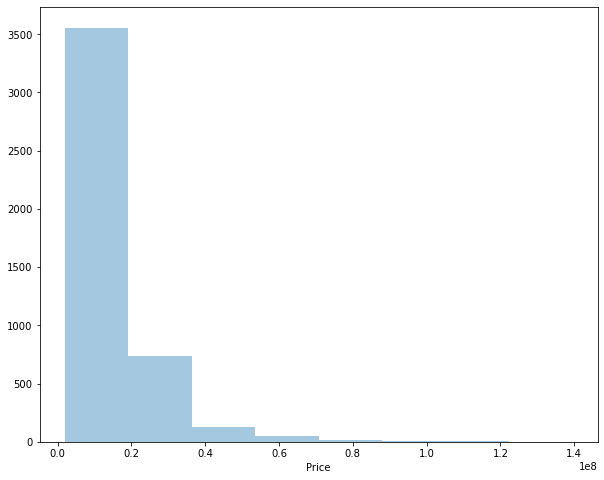

In [83]:
sns.distplot(df14["Price"], kde=False, bins=8)

<AxesSubplot:xlabel='Num_of_bedrooms', ylabel='Price'>

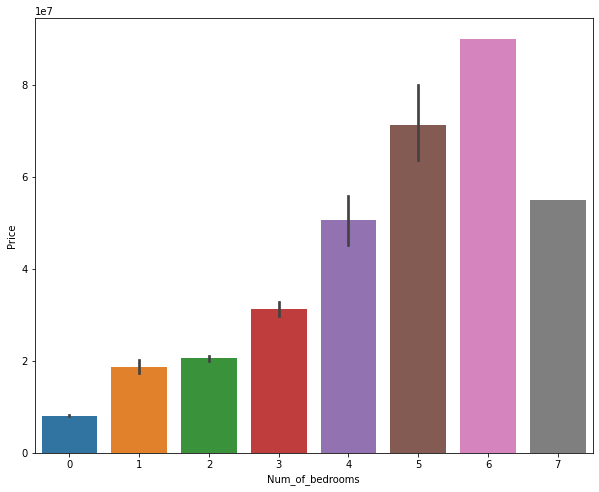

In [89]:
sns.barplot(x="Num_of_bedrooms", y="Price", data=df14)

<AxesSubplot:xlabel='Num_of_bathrooms', ylabel='Price'>

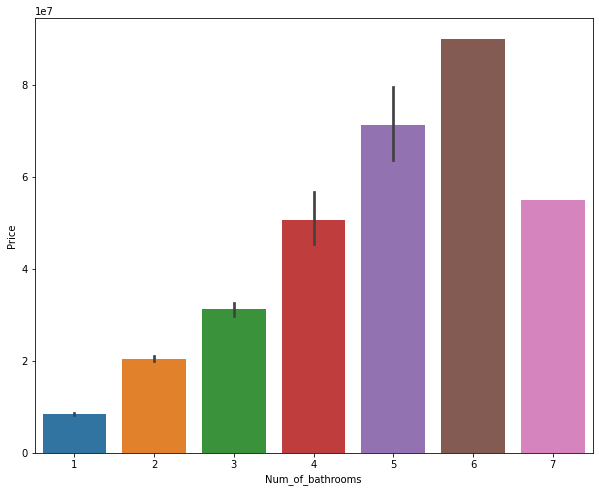

In [91]:
sns.barplot(x="Num_of_bathrooms", y="Price", data=df14)

<AxesSubplot:xlabel='Area', ylabel='Price'>

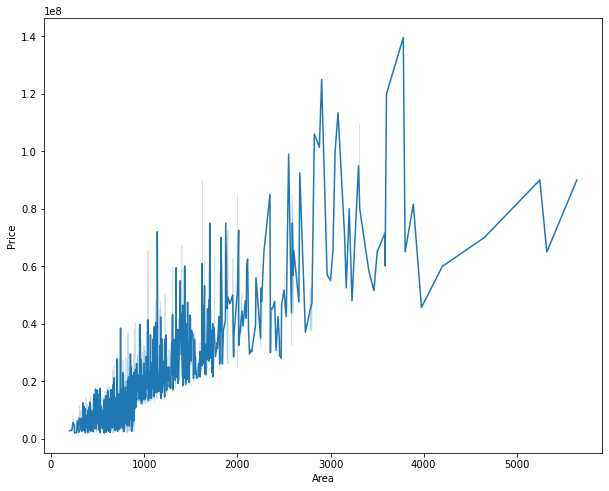

In [93]:
sns.lineplot(x="Area", y="Price", data=df14)